# <font color='green'>Projeto de Séries Temporais</font>

<p> Projeto desenvolvido através de técnicas e conhecimentos de Séries Temporais, utlizando o princípio de Monte Carlo com o objetivo de prever valores da criptomoeda Bitcoin.

### Análise do projeto
<p>
As Séries Temporais são nada mais do que uma série de pontos ordenados ao decorrer do tempo e seus conceitos podem ser aplicados nas seguintes áreas:
Economia: Produto Interno Bruto (PIB), Índice de Preços ao Consumidor (IPC), Índice S&P 500 e taxas de desemprego<br>
Ciências Sociais: Taxas de natalidade, população, dados de migração, indicadores políticos<br>
Epidemiologia: Taxas de doenças, taxas de mortalidade, populações de mosquitos<br>
Medicina:Controle de pressão arterial, controle de peso, medições de colesterol, monitoramento de frequência cardíaca<br>
Física:	Temperaturas globais, observações mensais de manchas solares, níveis de poluição.    
</p>

### Estudo de Caso - Simulação de Monte Carlo e Séries Temporais Para Modelagem Financeira

### Carregando pacotes a serem utilizados

In [1]:
# Importando pacote do Yahoo para habilitar dados de cotações

!pip3 install yfinance

In [2]:
# Carregando biblioteca yfinance
import yfinance as yF

# Manipulação de dados
import numpy as np
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Calcúlos estatísticos
import scipy

# Remover avisos futuros
import warnings
warnings.filterwarnings("ignore")

# Formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10

# Formatando valores com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format


### Carregando Dataset

In [4]:
# dados = pd.read_csv("dados.csv", parse_dates = True, index_col = "Data")
# Foi utilizado o parâmetro BTC-USD para carregar os dados da cryptocurrency Bitcoin

Cotacoes = yF.Ticker("BTC-USD")

# Iremos escolher o período de um ano(1y), mas temos as seguintes opções de períodos: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y e ytd.
dados = Cotacoes.history(period="1y")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-07-19 00:00:00+00:00,63972.32,67442.64,63329.34,66710.16,37003855410,0.00,0.00
2024-07-20 00:00:00+00:00,66709.92,67610.73,66299.62,67163.65,19029581250,0.00,0.00
2024-07-21 00:00:00+00:00,67164.91,68372.91,65842.30,68154.52,26652190004,0.00,0.00
2024-07-22 00:00:00+00:00,68152.98,68480.06,66611.30,67585.25,42649109453,0.00,0.00
2024-07-23 00:00:00+00:00,67584.80,67779.02,65484.46,65927.67,35605668666,0.00,0.00


In [5]:
# Traduzindo os dados para melhor entendimento

dados.drop('Dividends', axis=1, inplace=True)
dados.drop('Stock Splits', axis=1, inplace=True)
dados.columns = ['Abertura','Maximo','Minimo','Fechamento','Volume']
dados.head()

,Abertura,Maximo,Minimo,Fechamento,Volume
Date,,,,,
2024-07-19 00:00:00+00:00,63972.32,67442.64,63329.34,66710.16,37003855410
2024-07-20 00:00:00+00:00,66709.92,67610.73,66299.62,67163.65,19029581250
2024-07-21 00:00:00+00:00,67164.91,68372.91,65842.30,68154.52,26652190004
2024-07-22 00:00:00+00:00,68152.98,68480.06,66611.30,67585.25,42649109453
2024-07-23 00:00:00+00:00,67584.80,67779.02,65484.46,65927.67,35605668666


In [6]:
# Observando o range da variação do nosso dataset
print('Menor data: ', dados.index.min())
print('Maior data: ', dados.index.max())

Menor data:  2024-07-19 00:00:00+00:00
Maior data:  2025-07-19 00:00:00+00:00


In [7]:
# Vamos observar os dados referente a ultima data do nosso conjunto de dados
# Esses dados serão utilizados mais adiante para composição de parâmetros do nosso modelo de Monte Carlo
display(dados.loc[dados.index.max()])

Abertura          118002.22
Maximo            118002.22
Minimo            117958.44
Fechamento        117958.44
Volume       78824022016.00
Name: 2025-07-19 00:00:00+00:00, dtype: float64

In [8]:
# Calculando o percentual da diferença diária de fechamento da cotação em ações
# Ou seja, quanto o valor de fechamento varia de um dia para outro, o retorno diário da ação
retorno_diario = dados["Fechamento"].pct_change().dropna()
retorno_diario.head

<bound method NDFrame.head of Date
2024-07-20 00:00:00+00:00    0.01
2024-07-21 00:00:00+00:00    0.01
2024-07-22 00:00:00+00:00   -0.01
2024-07-23 00:00:00+00:00   -0.02
2024-07-24 00:00:00+00:00   -0.01
                             ... 
2025-07-14 00:00:00+00:00    0.01
2025-07-15 00:00:00+00:00   -0.02
2025-07-16 00:00:00+00:00    0.01
2025-07-17 00:00:00+00:00    0.00
2025-07-19 00:00:00+00:00   -0.01
Name: Fechamento, Length: 364, dtype: float64>

In [9]:
dados = pd.merge(dados, retorno_diario, how = 'inner', on = 'Date')
dados.columns = ['Abertura','Maximo','Minimo','Fechamento','Volume','Variacao_Diaria']
dados.head

<bound method NDFrame.head of                            Abertura    Maximo    Minimo  Fechamento  \
Date                                                                  
2024-07-20 00:00:00+00:00  66709.92  67610.73  66299.62    67163.65   
2024-07-21 00:00:00+00:00  67164.91  68372.91  65842.30    68154.52   
2024-07-22 00:00:00+00:00  68152.98  68480.06  66611.30    67585.25   
2024-07-23 00:00:00+00:00  67584.80  67779.02  65484.46    65927.67   
2024-07-24 00:00:00+00:00  65927.86  67113.98  65147.00    65372.13   
...                             ...       ...       ...         ...   
2025-07-14 00:00:00+00:00 119115.79 123091.61 118959.20   119849.70   
2025-07-15 00:00:00+00:00 119853.85 119935.56 115765.69   117777.19   
2025-07-16 00:00:00+00:00 117777.19 120065.52 117064.82   118738.51   
2025-07-17 00:00:00+00:00 118738.51 120999.61 117508.22   119289.84   
2025-07-19 00:00:00+00:00 118002.22 118002.22 117958.44   117958.44   

                                 Volume  Varia

In [10]:
# Vamos ver os tipos dos dados
dados.dtypes

Abertura           float64
Maximo             float64
Minimo             float64
Fechamento         float64
Volume               int64
Variacao_Diaria    float64
dtype: object

In [11]:
# Shape do Dataframe
dados.shape

(364, 6)

In [12]:
# Mostrando dados estatísticos
dados.describe()

,Abertura,Maximo,Minimo,Fechamento,Volume,Variacao_Diaria
count,364.00,364.00,364.00,364.00,364.00,364.00
mean,86597.00,88192.49,85035.08,86740.50,45472492015.59,0.00
std,17683.77,17846.20,17539.64,17735.43,24545267817.47,0.03
min,53949.09,54838.14,49121.24,53948.75,9863214091.00,-0.09
25%,67609.01,68453.87,66638.37,67761.81,29587452438.75,-0.01
50%,92568.87,94902.67,90995.83,92872.75,40847957496.00,0.00
75%,101257.18,103248.49,99259.95,101342.60,54700785430.75,0.01
max,119853.85,123091.61,118959.20,119849.70,181746419401.00,0.12


## Visualizando o Preço Diário de Fechamento das Ações no Tempo

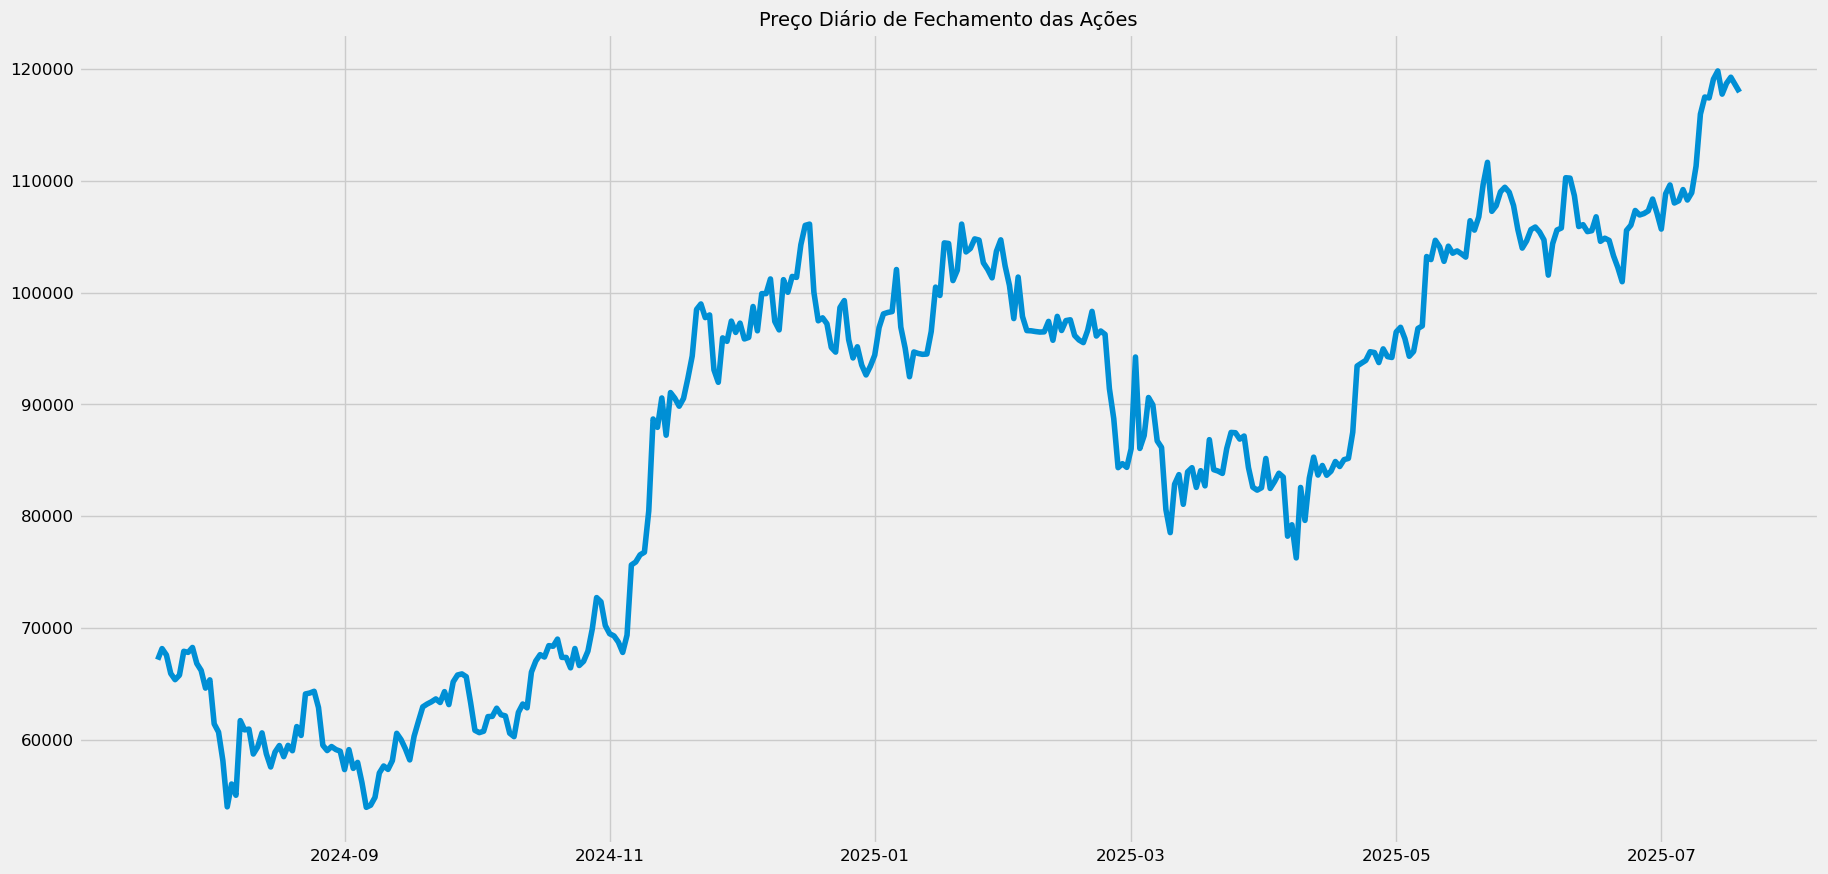

In [14]:
# Plot
plt.plot(dados['Fechamento'])
plt.title("Preço Diário de Fechamento das Ações", size = 14)
plt.show()       

In [15]:
# Retorno acumulado
retorno_diario_acumulado = (1 + retorno_diario).cumprod() - 1
retorno_diario_acumulado.max()

0.7965735633395374

### Análise Exploratória & Estatística Descritiva

Usando Estatística para calcular o retorno médio e variação(desvio padrão).

In [18]:
# Média do fechamento diário da cotação das ações
media_retorno_diario = np.mean(retorno_diario)

In [19]:
# Desvio padrão do fechamento diário da cotação das ações
desvio_retorno_diario = np.std(retorno_diario)

In [20]:
# Média e desvio padrão
print("Média do Retorno de Fechamento:", media_retorno_diario)
print("Desvio Padrão do Retorno de Fechamento:", desvio_retorno_diario)

Média do Retorno de Fechamento: 0.0018882885673085956
Desvio Padrão do Retorno de Fechamento: 0.025469658936924593


A maioria dos criptoativos tem funcionamento 364 dias no ano. Ações comuns da bolsa de valores tem funcionamento 252 dias no ano, contando somente dias de segunda a sexta.

In [22]:
# Média e desvio padrão no ano (considerando 364 dias de operações)
print("Retorno Médio Anualizado de Fechamento:", (1 + media_retorno_diario) ** 364 - 1)
print("Desvio Padrão Anualizado de Fechamento:", desvio_retorno_diario*np.sqrt(364))

Retorno Médio Anualizado de Fechamento: 0.987125076387251
Desvio Padrão Anualizado de Fechamento: 0.4859301221330364


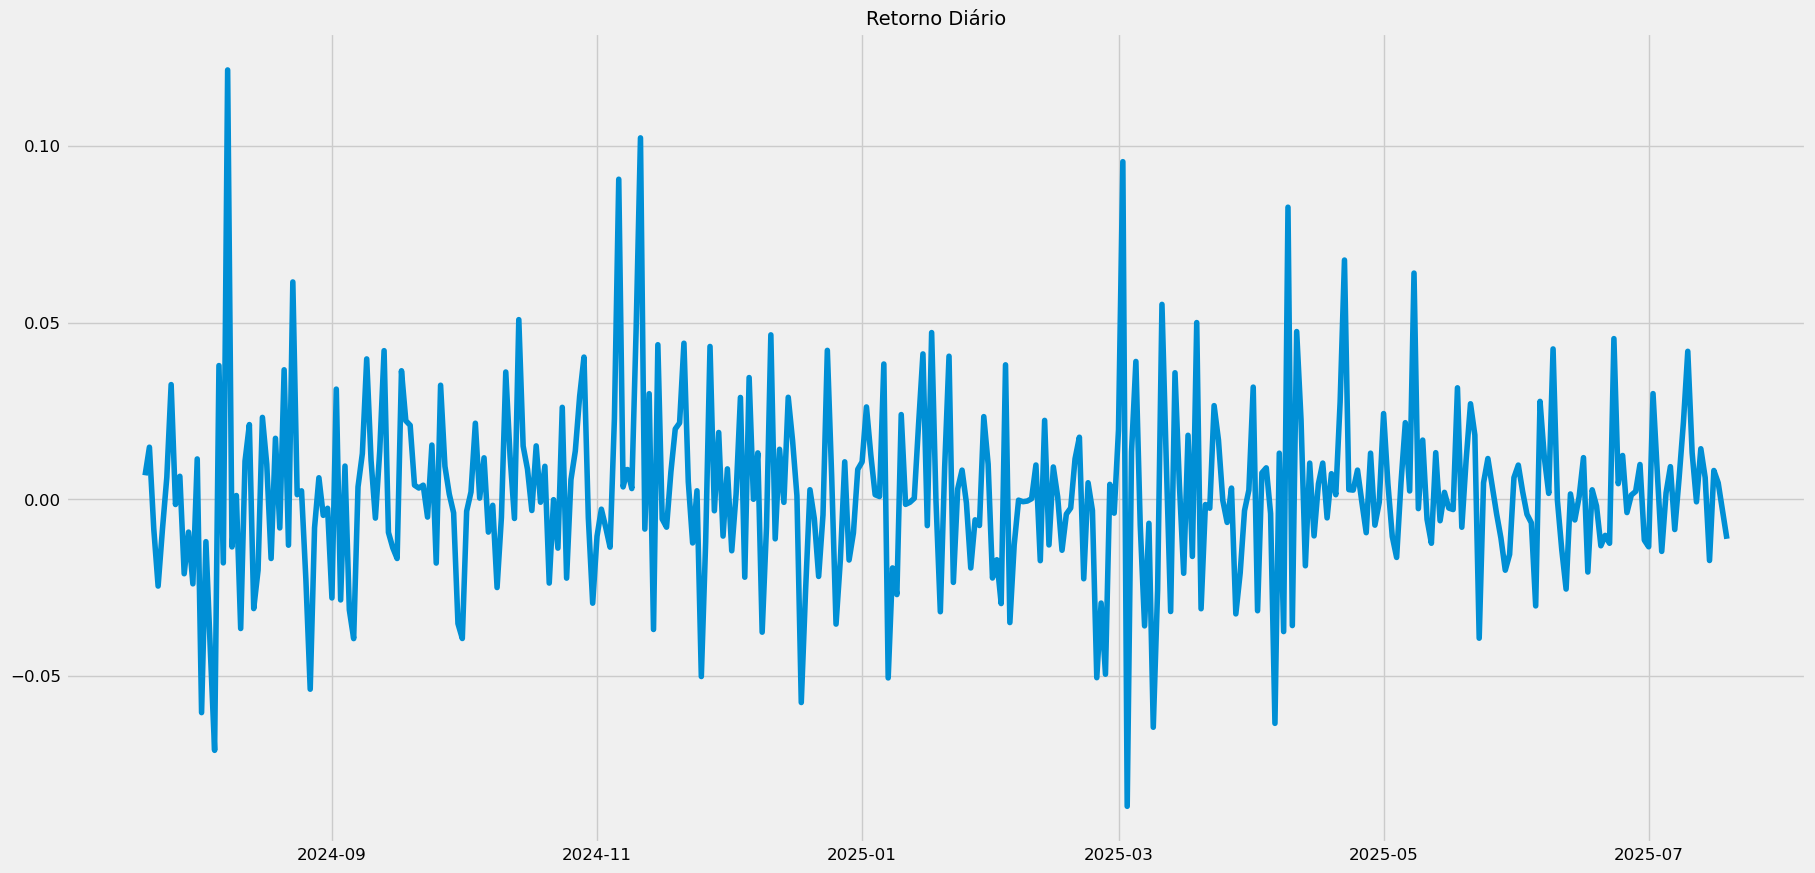

In [23]:
# Plot
plt.plot(retorno_diario)
plt.title("Retorno Diário", size = 14)
plt.show()

Com apenas 4 grandes variações durante o período anual no gráfico, podemos ver que a variação se manteve a mesma durante o ciclo.

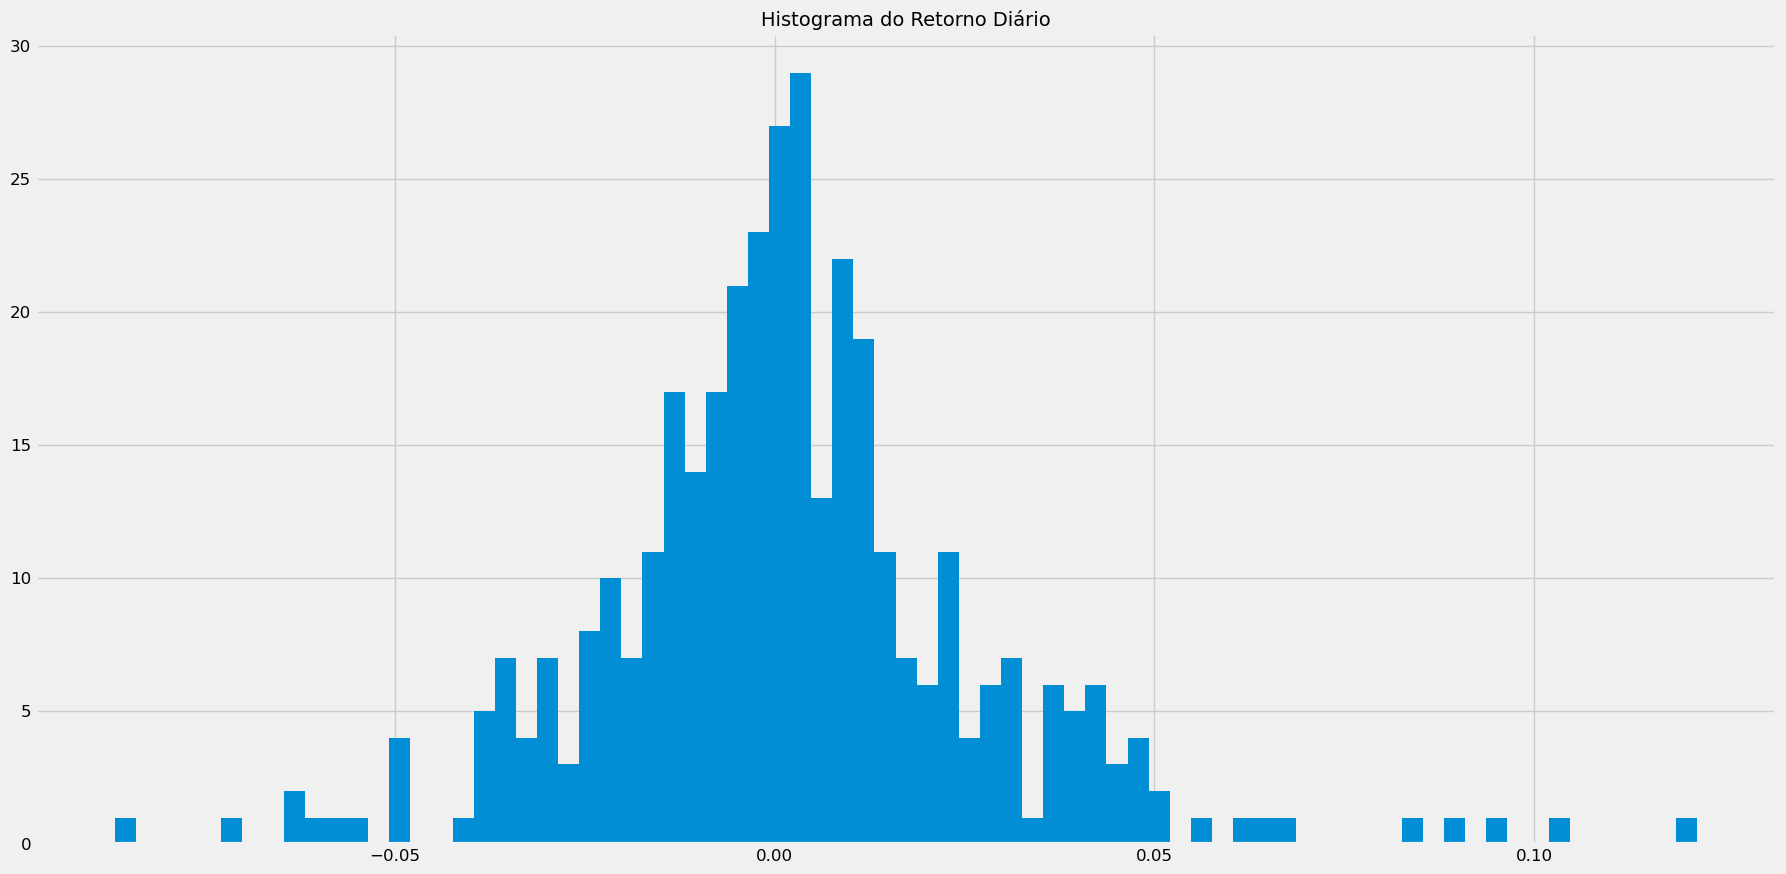

In [25]:
# Plot
plt.hist(retorno_diario, bins = 75)
plt.title("Histograma do Retorno Diário", size = 14)
plt.show()

Os valores estão bem próximos da média.

In [27]:
# Realizando transformação de log e diferenciação para cálculo do retorno diário
log_retorno_diario = (np.log(dados["Fechamento"]) - np.log(dados["Fechamento"]).shift(-1)).dropna()

# Calculando média e desvio padrão depois da transformação
log_media_retorno_diario = np.mean(log_retorno_diario)
log_desvio_retorno_diario = np.std(log_retorno_diario)

Criando um plot com o retorno diário transformado.

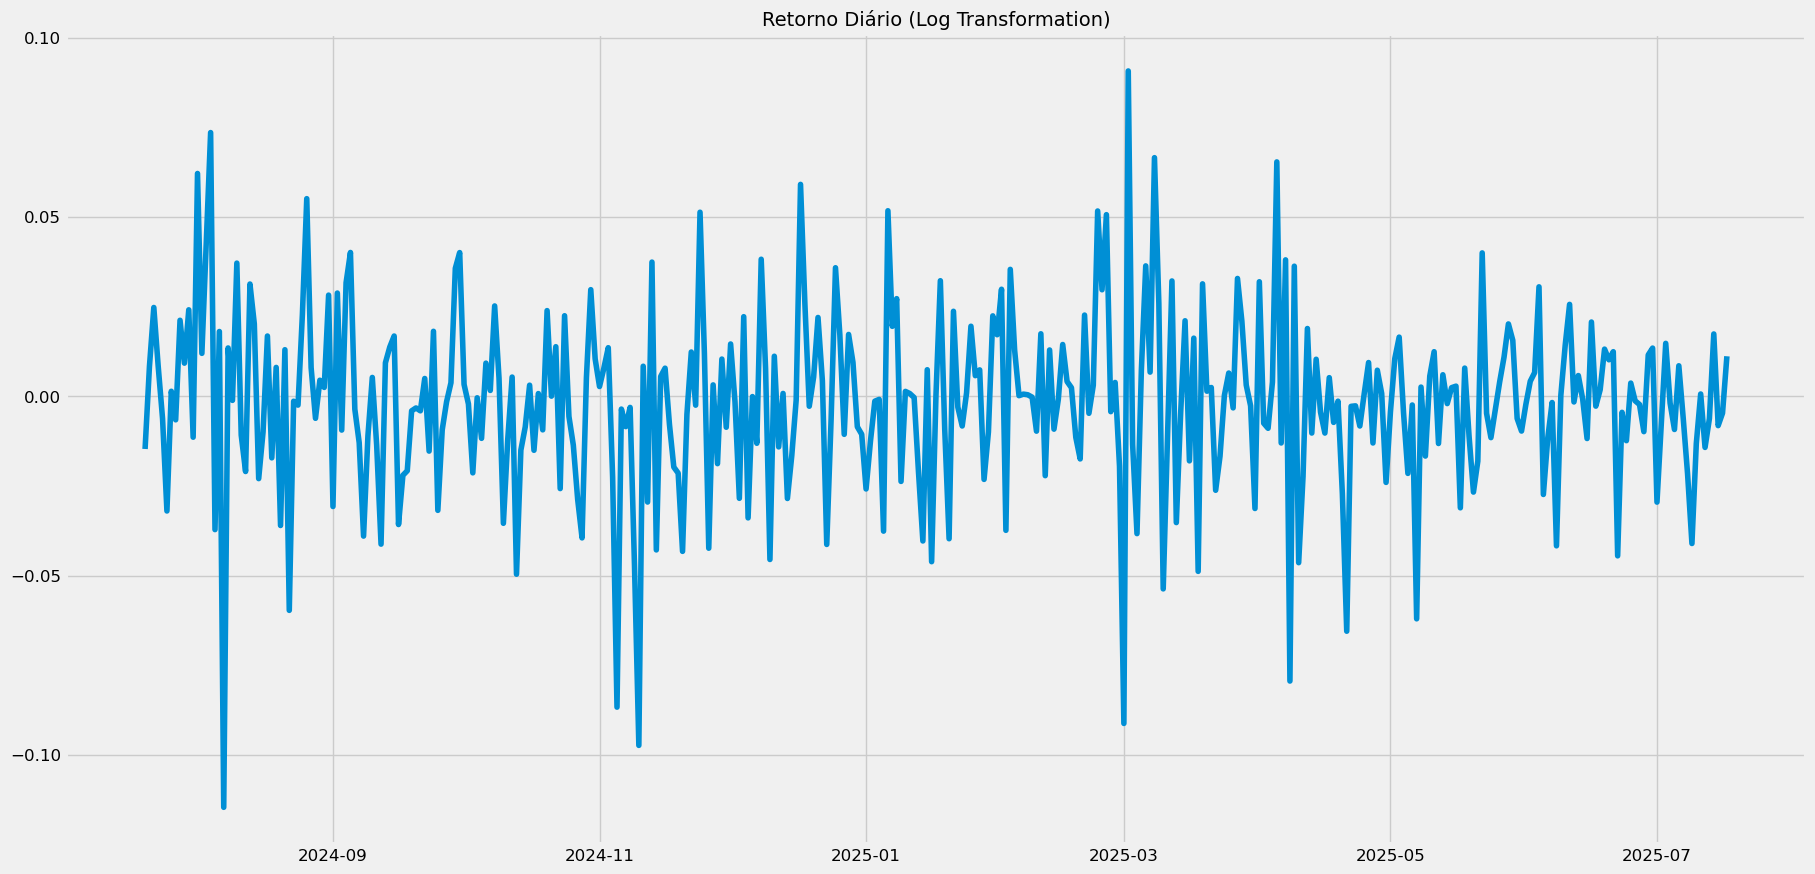

In [29]:
# Plot
plt.plot(log_retorno_diario)
plt.title("Retorno Diário (Log Transformation)", size = 14)
plt.show()

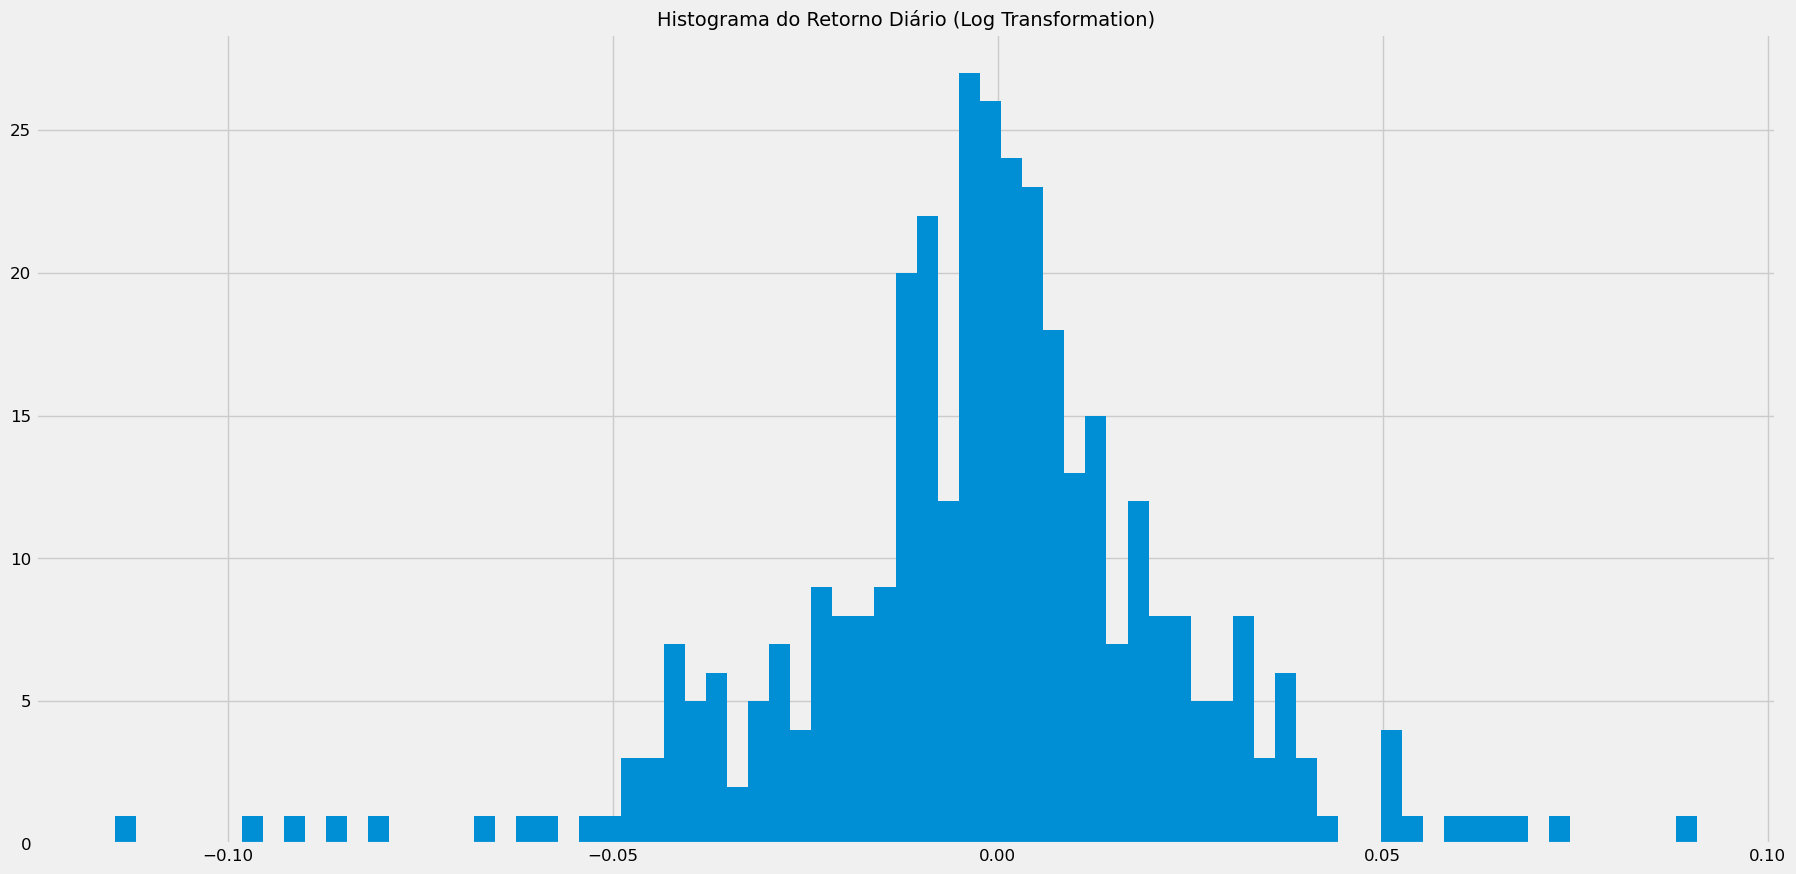

In [30]:
# Plot
plt.hist(log_retorno_diario, bins = 75)
plt.title("Histograma do Retorno Diário (Log Transformation)", size = 14)
plt.show()

### Valor Histórico

Iremos calcular o valor histórico do preço da ação.

In [33]:
# Nível de variância
var_level = 95
var = np.percentile(log_retorno_diario, 100 - var_level)
print("Certeza de que as perdas diárias não excederão VaR% em um determinado dia com base em valores históricos.")
print("VAR 95%", var)

Certeza de que as perdas diárias não excederão VaR% em um determinado dia com base em valores históricos.
VAR 95% -0.04226192843094818


In [34]:
# Var para os próximos 5 dias
var * np.sqrt(5)

-0.09450054483183115

### Valor Condicional

In [36]:
# Nível de variância
var_level = 95
var = np.percentile(log_retorno_diario, 100 - var_level)
cvar = log_retorno_diario[log_retorno_diario < var].mean()
print("Nos piores 5% dos casos, as perdas foram, em Média, superiores ao percentual histórico.")
print("CVaR 95%:", cvar)

Nos piores 5% dos casos, as perdas foram, em Média, superiores ao percentual histórico.
CVaR 95%: -0.06137736658267276


### Simulação de MonteCarlo

In [66]:
# Realizando a Simulação de MonteCarlo

# Números de dias a frente
dias_posteriores = 100

# Número de simulações
simulacoes = 2500

# Último valor da ação
ultimo_preco = 118002.00

# Cria um array vazio com as dimensões
results = np.empty((simulacoes, dias_posteriores))

# Loop por cada simulação
for s in range(simulacoes):
    # Calcula o retorno com dados randômicos seguindo uma distribuição normal
    random_returns = 1 + np.random.normal(loc = log_media_retorno_diario,
                                          scale = log_desvio_retorno_diario,
                                          size = dias_posteriores)

    result = ultimo_preco * (random_returns.cumprod())

    results[s, :] = result

In [81]:
# Definindo o índice da série simulada
index = pd.date_range("2025-07-18", periods = dias_posteriores, freq = "D")
resultados = pd.DataFrame(results.T, index = index)
media_resultados = resultados.apply("mean", axis = 1)

### Resultado da Simulação de MonteCarlo

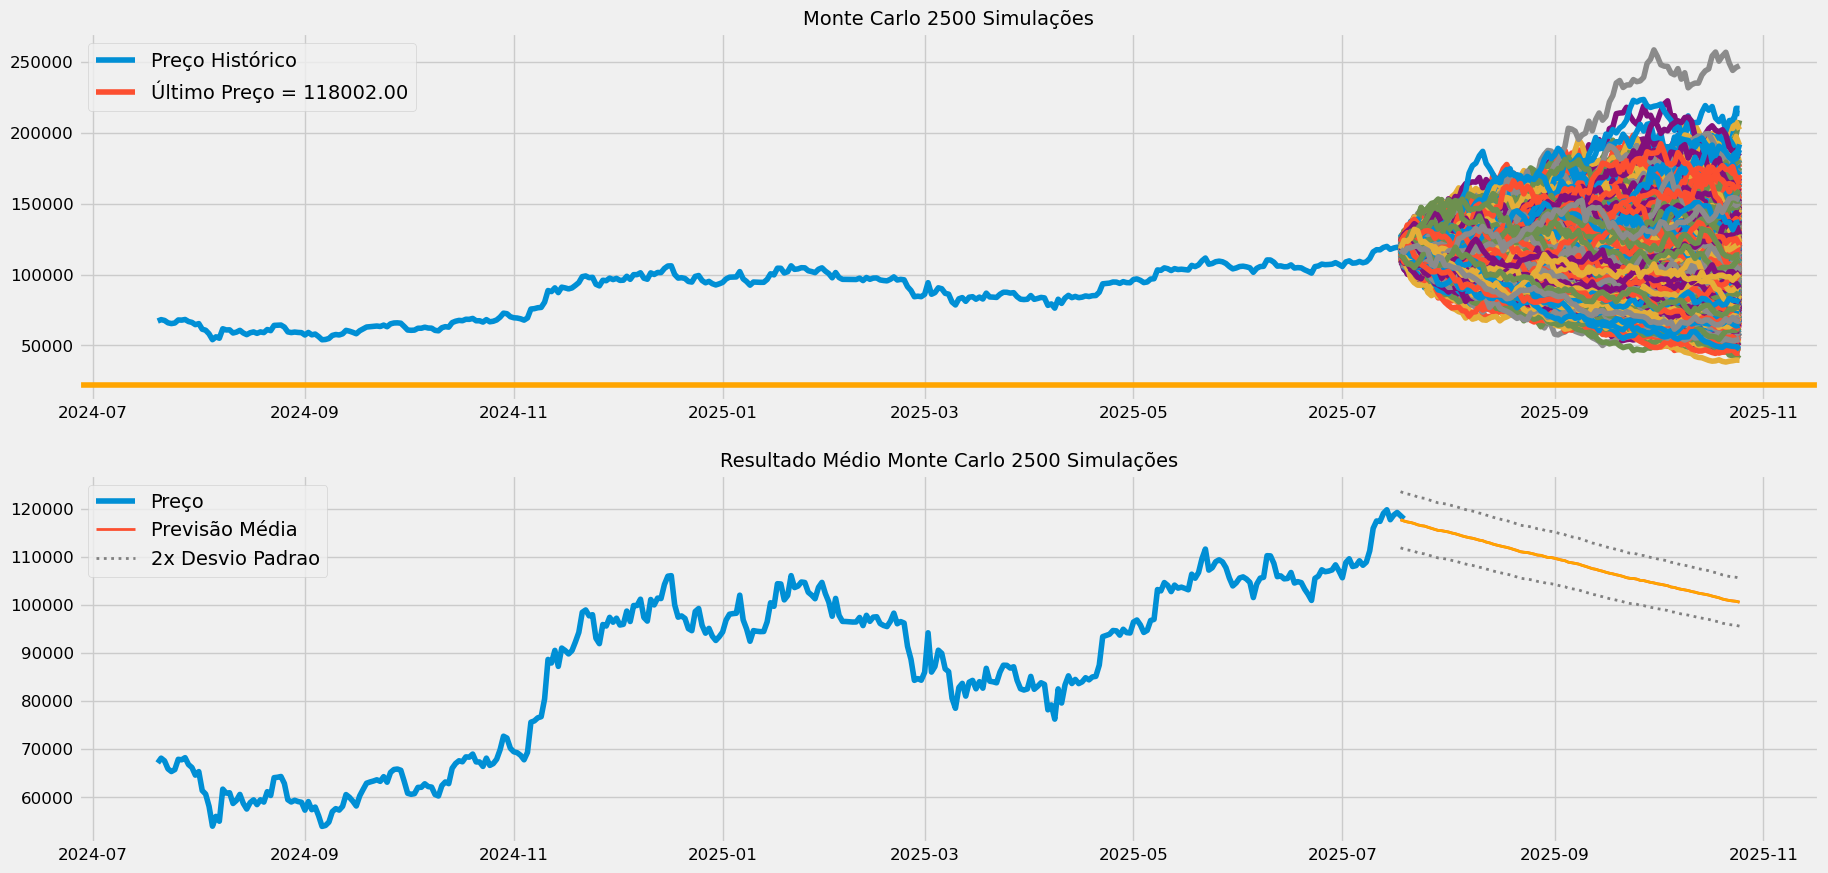

In [83]:
# Dividindo a área de plotagem em 2 subplots
fig, ax = plt.subplots(nrows = 2, ncols = 1)

# Plot
ax[0].plot(dados["Fechamento"][:"2026-01-31"])

ax[0].plot(resultados)

ax[0].axhline(22307.00, c = "orange")

ax[0].set_title(f"Monte Carlo {simulacoes} Simulações", size = 14)

ax[0].legend(["Preço Histórico", "Último Preço = 118002.00"])

ax[1].plot(dados["Fechamento"][:"2026-01-31"])

ax[1].plot(resultados.apply("mean", axis = 1), lw = 2)

ax[1].plot(media_resultados.apply((lambda x: x * (1+1.96 * log_desvio_retorno_diario))), 
           lw = 2, linestyle = "dotted", c = "gray")

ax[1].plot(media_resultados, lw = 2, c = "orange")

ax[1].plot(media_resultados.apply((lambda x: x * (1-1.96 * log_desvio_retorno_diario))), 
           lw = 2, linestyle = "dotted", c = "gray")

ax[1].set_title(f"Resultado Médio Monte Carlo {simulacoes} Simulações", size = 14)

ax[1].legend(["Preço", "Previsão Média", "2x Desvio Padrao"])

plt.show()